Resistenza del filo ideale: 0.49 Ohm


,Tensione Ideale (V),Corrente Ideale (A),Tensione Misurata (V),Corrente Misurata (A)
0,5.000000,10.204082,4.915608,10.704654
1,6.315789,12.889366,6.655141,12.757453
2,7.631579,15.574651,8.084825,15.188346
3,8.947368,18.259936,8.103384,19.077936
4,10.263158,20.945220,9.498648,22.880596
5,11.578947,23.630505,11.893696,24.039086
6,12.894737,26.315789,12.614554,26.478359
7,14.210526,29.001074,14.662173,28.466220
8,15.526316,31.686359,16.075569,30.638141
9,16.842105,34.371643,17.082025,33.776711


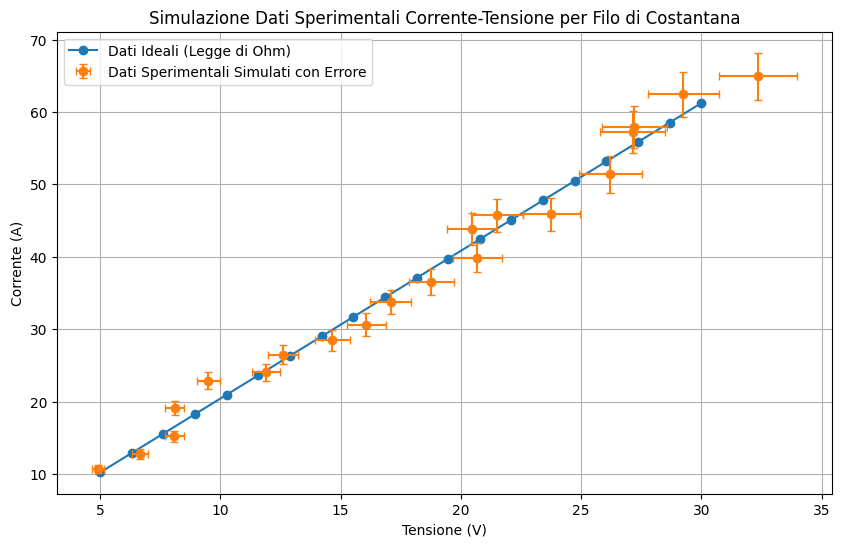


Risultati della regressione lineare:
Pendenza (1/Resistenza): 2.0345 A/V, Errore sulla pendenza: 0.0574 A/V
Intercetta: 0.1740 A, Errore sull'intercetta: 1.1221 A
Resistenza stimata dai dati sperimentali: 0.4915 Ohm, Errore sulla resistenza stimata: 0.0139 Ohm

Resistività misurata della costantana: 4.92e-07 Ohm*m, Errore sulla resistività misurata: 1.39e-08 Ohm*m
Resistività ideale della costantana: 4.90e-07 Ohm*m
Differenza percentuale tra resistività misurata e ideale: 0.31%


In [18]:
# @title
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Dati del filo di costantana
resistivity = 0.49e-6  # Resistività della costantana in ohm*m
length = 1.0  # Lunghezza del filo in m
area = 1.0e-6  # Sezione del filo in m^2 (1 mm^2 = 1e-6 m^2)

# Calcolo della resistenza del filo
resistance = (resistivity * length) / area
print(f"Resistenza del filo ideale: {resistance} Ohm")

# Intervallo di tensioni
voltages_ideal = np.linspace(5, 30, 20)  # 20 punti di tensione tra 5V e 30V

# Simulazione della corrente ideale (legge di Ohm)
currents_ideal = voltages_ideal / resistance

# Aggiunta degli errori di misura (errore relativo del 5%)
error_percentage = 0.05

voltages_measured = voltages_ideal * (1 + np.random.normal(0, error_percentage, len(voltages_ideal)))
currents_measured = currents_ideal * (1 + np.random.normal(0, error_percentage, len(currents_ideal)))

# Creazione di un DataFrame per visualizzare i dati
data = {'Tensione Ideale (V)': voltages_ideal,
        'Corrente Ideale (A)': currents_ideal,
        'Tensione Misurata (V)': voltages_measured,
        'Corrente Misurata (A)': currents_measured}
df = pd.DataFrame(data)

display(df)

# Visualizzazione dei dati
plt.figure(figsize=(10, 6))
plt.plot(voltages_ideal, currents_ideal, label='Dati Ideali (Legge di Ohm)', marker='o')
plt.errorbar(voltages_measured, currents_measured,
             xerr=voltages_measured * error_percentage,
             yerr=currents_measured * error_percentage,
             fmt='o', label='Dati Sperimentali Simulati con Errore', capsize=3)

plt.xlabel('Tensione (V)')
plt.ylabel('Corrente (A)')
plt.title('Simulazione Dati Sperimentali Corrente-Tensione per Filo di Costantana')
plt.legend()
plt.grid(True)
plt.show()

# Regressione lineare con statsmodels
X_measured = sm.add_constant(voltages_measured) # Add a constant for the intercept
model = sm.OLS(currents_measured, X_measured)
results = model.fit()

# Stima della resistenza e il suo errore
# La pendenza della retta I = (1/R) * V + intercept è data dal coefficiente di V
slope = results.params[1] # Coefficiente di V
intercept = results.params[0] # Intercetta

estimated_resistance = 1 / slope
error_on_slope = results.bse[1] # Standard error of the slope

# Propagazione dell'errore per l'inverso della pendenza (resistenza)
# Errore sulla resistenza stimata: |d(1/slope)/dslope| * error_on_slope = (1/slope^2) * error_on_slope
error_on_resistance = (1 / slope**2) * error_on_slope

print(f"\nRisultati della regressione lineare:")
print(f"Pendenza (1/Resistenza): {slope:.4f} A/V, Errore sulla pendenza: {error_on_slope:.4f} A/V")
print(f"Intercetta: {intercept:.4f} A, Errore sull'intercetta: {results.bse[0]:.4f} A")
print(f"Resistenza stimata dai dati sperimentali: {estimated_resistance:.4f} Ohm, Errore sulla resistenza stimata: {error_on_resistance:.4f} Ohm")

# Calcolo della resistività misurata e il suo errore
measured_resistivity = (estimated_resistance * area) / length
error_on_measured_resistivity = (error_on_resistance * area) / length

print(f"\nResistività misurata della costantana: {measured_resistivity:.2e} Ohm*m, Errore sulla resistività misurata: {error_on_measured_resistivity:.2e} Ohm*m")
print(f"Resistività ideale della costantana: {resistivity:.2e} Ohm*m")

# Confronto con la resistività ideale (errore percentuale)
percentage_difference_resistivity = abs((measured_resistivity - resistivity) / resistivity) * 100
print(f"Differenza percentuale tra resistività misurata e ideale: {percentage_difference_resistivity:.2f}%")